In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data_training = pd.read_csv('test.csv')
x_tr = data_training.drop('diabetes', axis=1)
y_tr = data_training['diabetes']

# Definisco la funzione per calcolare la Sigmoide

In [78]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [79]:
numero_iterazioni = 1000
numero_parametri = 9
numero_dati = x_tr.shape[0]
learning_rate = 0.0001

In [80]:
x_tr['bias'] = np.ones(len(x_tr.index))

pesi_parametri = np.zeros(numero_parametri)

def cost(x, y, pesi_parametri):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, pesi_parametri))
    cost = (np.matmul(-y.T, np.log(h)) - np.matmul((1 -y.T), np.log(1 - h)))/m
    return cost

def gradient_Descent(pesi_parametri, alpha, x , y):
    m = x.shape[0]
    h = sigmoid(np.matmul(x, pesi_parametri))
    grad = np.matmul(x.T, (h - y)) / m;
    pesi_parametri = pesi_parametri - alpha * grad
    return pesi_parametri

In [81]:
pesi_parametri = np.zeros([numero_parametri, numero_iterazioni])
pesi_parametri[:,0] = np.random.normal(size=[9])
valore_funzione_costo = []
valore_funzione_costo.append(cost(x_tr, y_tr, pesi_parametri[:,0]))
for i in range(0, numero_iterazioni-1):
        # calcolo il valore della sigmoide
        # print(f"Traning: {x_tr.shape} Pesi Parametri: {pesi_parametri.shape}")
        h = sigmoid(np.matmul(x_tr, pesi_parametri[:,i]))
        #calcolo il gradiente
        gradient = np.matmul(x_tr.T, (h-y_tr)) / numero_dati
        #aggiorno i pesi
        pesi_parametri[:,i+1] = pesi_parametri[:,i] - learning_rate * gradient
        
        valore_funzione_costo.append(cost(x_tr, y_tr, pesi_parametri[:,i+1]))

# for i in range(n_iterations):
#     pesi_parametri = gradient_Descent(pesi_parametri, learning_rate, x_tr, y_tr)
#     if i % 50 == 0:
#         print(cost(x_tr, y_tr, pesi_parametri))



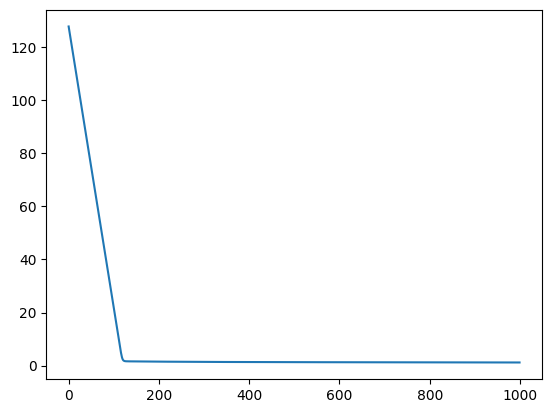

In [91]:
import seaborn as sns
plt.plot(valore_funzione_costo)
